<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0.5, 1.0, "Respondent's Salaries")

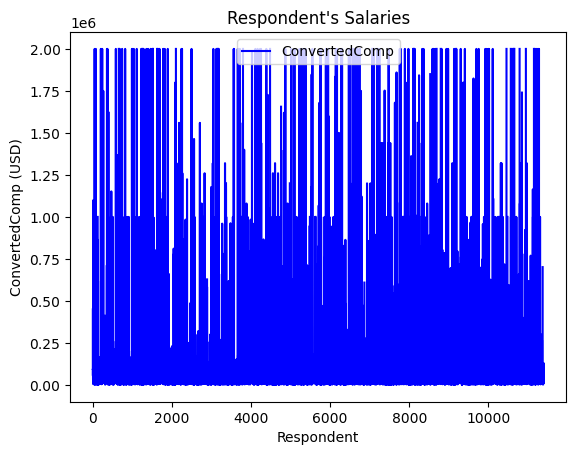

In [51]:
# your code goes here
dist = df['ConvertedComp'].reset_index()
dist.plot(x='index', y='ConvertedComp', kind='line', color='blue')
plt.xlabel('Respondent')
plt.ylabel('ConvertedComp (USD)')
plt.title("Respondent's Salaries")
#df.plot(y='ConvertedComp', kind='line')

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 1.0, 'Distribution of Salaries')

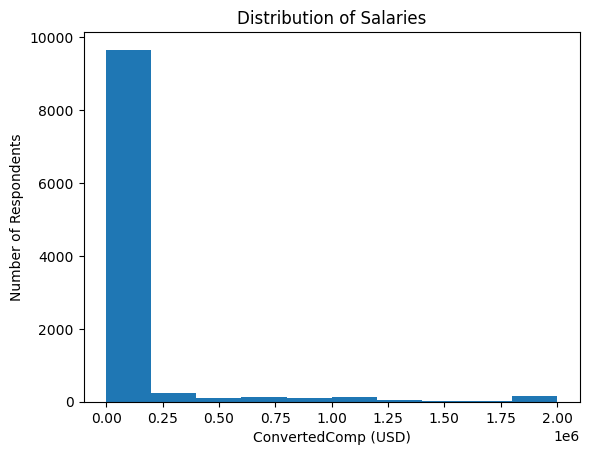

In [47]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', bins=10)
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Salaries')


What is the median of the column `ConvertedComp`?


In [43]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [46]:
# your code goes here
df.groupby(['Gender']).count()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SOComm,WelcomeChange,SONewContent,Age,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Gender,,,,,,,,,,,,,,,,,,,,,
Man,10480,10480,10480,10480,10411,10480,10480,10433,10381,9800,...,10480,10401,8648,10214,10400,10047,9873,10347,10464,10467
"Man;Non-binary, genderqueer, or gender non-conforming",26,26,26,26,26,26,26,26,25,26,...,26,26,23,24,25,24,26,26,26,26
"Non-binary, genderqueer, or gender non-conforming",63,63,63,63,63,63,63,63,62,61,...,63,63,52,62,55,41,59,63,63,63
Woman,731,731,731,731,719,731,731,727,721,686,...,731,727,626,719,728,682,692,726,728,730
Woman;Man,9,9,9,9,9,9,9,9,9,8,...,9,8,9,8,9,8,8,8,9,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,1,1,2,2,2
"Woman;Non-binary, genderqueer, or gender non-conforming",14,14,14,14,14,14,14,14,14,13,...,14,14,13,14,13,12,13,14,14,14


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [52]:
# your code goes here
df.groupby(['Gender']).median()

<ipython-input-52-8ae669a73b6d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gender']).median()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Gender,,,,,,
Man,12521.5,65000.0,57744.0,40.0,4.0,29.0
"Man;Non-binary, genderqueer, or gender non-conforming",13609.0,65000.0,59520.0,40.0,3.5,28.0
"Non-binary, genderqueer, or gender non-conforming",11807.0,66000.0,67142.0,40.0,4.0,27.0
Woman,11973.0,65000.0,57708.0,40.0,4.0,28.0
Woman;Man,14844.0,30000.0,21648.0,40.0,6.0,29.5
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",12228.0,42350.0,30244.0,60.0,4.0,26.5
"Woman;Non-binary, genderqueer, or gender non-conforming",10285.0,78500.0,65535.5,40.0,3.0,26.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [57]:
# your code goes here
age_stats = df['Age']
age_stats.describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Distribution of Ages')

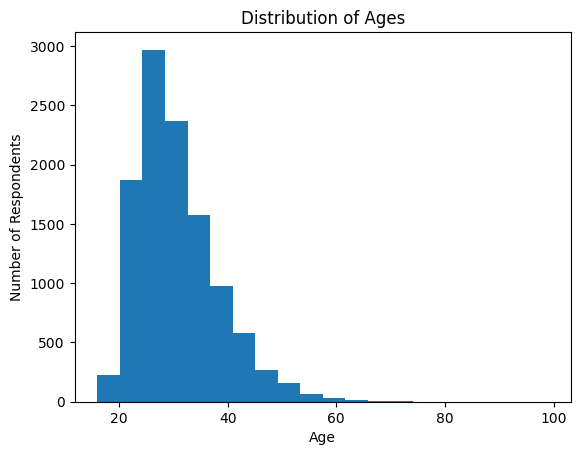

In [66]:
# your code goes here
df['Age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Ages')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

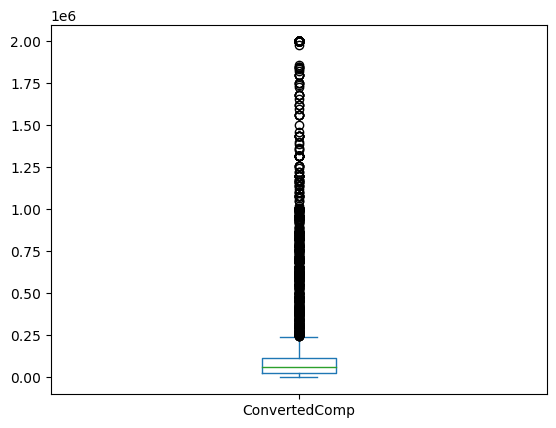

In [88]:
# your code goes here
box_data = df['ConvertedComp']
box_data1 = box_data.fillna(box_data.mean())
box_data1.plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [89]:
# your code goes here
import numpy as np
q75, q25 = np.percentile(box_data1, [75 ,25])
iqr = q75-q25
iqr

86448.0

Find out the upper and lower bounds.


In [90]:
# your code goes here
box_data1.describe()

count    1.139800e+04
mean     1.315967e+05
std      2.840375e+05
min      0.000000e+00
25%      2.901600e+04
50%      6.301600e+04
75%      1.154640e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Identify how many outliers are there in the `ConvertedComp` column.


In [103]:
# your code goes here
outlier_limit = q75 + (1.5*iqr)
outlier_limit
print((box_data1 > outlier_limit).sum())

811


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [126]:
# your code goes here
index_names = df[df['ConvertedComp'] > outlier_limit].index
new_df = df.drop(index_names)
new_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [139]:
# your code goes here
corr1 = df['Age'].corr(df['ConvertedComp'])
corr2 = df['Age'].corr(df['CompTotal'])
#corr3 = df['Age'].corr(df['YearsCode'])
#corr4 = df['Age'].corr(df['Age1stCode'])
#corr5 = df['Age'].corr(df['YearsCodePro'])
corr6 = df['Age'].corr(df['WorkWeekHrs'])
print("Correlation between Age and ConvertedComp is: ", round(corr1, 2))
print("Correlation between Age and CompTotal is: ", round(corr2, 2))
#print("Correlation between Age and YearsCode is: ", round(corr3, 2))
#print("Correlation between Age and Age1stCode is: ", round(corr4, 2))
#print("Correlation between Age and YearsCodePro is: ", round(corr5, 2))
print("Correlation between Age and WorkWeekHrs is: ", round(corr6, 2))

Correlation between Age and ConvertedComp is:  0.11
Correlation between Age and CompTotal is:  0.01
Correlation between Age and WorkWeekHrs is:  0.04


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
